In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mbl
from scipy import stats
%matplotlib inline

from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

In [2]:
statcast_2016 = pd.read_csv("/Users/orah82/baseball_cap/data_2016.csv")

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 101)

In [4]:
statcast_2016.drop(columns="Unnamed: 0", inplace=True)
statcast_2016.set_index("index", inplace=True)

In [5]:
features = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate', 'pfx_x', 'pfx_z', 'events']



In [6]:
statcast_beta = statcast_2016[features]

In [7]:
statcast_beta.head()

,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z,events
index,,,,,,,
13,89.9,-1.3285,6.2611,2119.0,-0.212108,0.581267,field_out
15,90.0,-1.0754,6.3885,1976.0,-0.159225,0.727467,NaN
19,90.8,-1.1806,6.3923,2181.0,-0.021450,0.819200,NaN
22,95.7,-1.1880,6.4365,2091.0,-0.579508,1.335200,strikeout
24,89.1,-1.2936,6.3917,2141.0,0.259667,0.575533,NaN


In [8]:
statcast_beta.dropna(how='any', axis=0, inplace=True)

/Users/orah82/anaconda3/envs/DSI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
 statcast_beta= statcast_beta.replace(['single','walk','double','home_run',
                                'hit_by_pitch', 'sac_fly', 'sac_bunt','triple','run','sac_bunt_double_play'],0)

In [16]:
statcast_beta= statcast_beta.replace(['intent_walk','pickoff_1b','sac_fly_double_play','field_error','catcher_interf','pickoff_2b',
                                     "pickoff_caught_stealing_3b","pickoff_caught_stealing_2b"], 1)

In [18]:
statcast_beta = statcast_beta.replace(['caught_stealing_home','fielders_choice','double_play','field_out', "strikeout", 'force_out',
                             'grounded_into_double_play','fielders_choice_out',
                             'strikeout_double_play','other_out','sac_fly_double_play',
                             'pickoff_caught_stealing_home','batter_interference',
                             'caught_stealing_2b','triple_play','caught_stealing_3b'],2)

In [20]:
X = statcast_beta.drop(columns='events')

In [22]:
y= statcast_beta['events']

In [23]:
X.shape

(166247, 6)

In [24]:
y.shape

(166247,)

In [50]:
y.mean()

0.33333334

In [31]:
y = to_categorical(y)

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   random_state=77)

In [45]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [46]:
model = Sequential()

model.add(Dense(64, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(32, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(16, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6


model.add(Dense(y.shape[1], # 3 neurons, one neuron per class
                activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_train_sc, y_train,
          epochs=30,
          batch_size=512,
          validation_data=(X_test_sc, y_test))

Train on 124685 samples, validate on 41562 samples
Epoch 1/30
124685/124685 [==============================] - 1s 4us/sample - loss: 0.7252 - accuracy: 0.6530 - val_loss: 0.6904 - val_accuracy: 0.6577
Epoch 2/30
124685/124685 [==============================] - 0s 3us/sample - loss: 0.6903 - accuracy: 0.6567 - val_loss: 0.6866 - val_accuracy: 0.6584
Epoch 3/30
124685/124685 [==============================] - 0s 3us/sample - loss: 0.6883 - accuracy: 0.6569 - val_loss: 0.6854 - val_accuracy: 0.6586
Epoch 4/30
124685/124685 [==============================] - 0s 3us/sample - loss: 0.6870 - accuracy: 0.6569 - val_loss: 0.6848 - val_accuracy: 0.6586
Epoch 5/30
124685/124685 [==============================] - 0s 3us/sample - loss: 0.6864 - accuracy: 0.6570 - val_loss: 0.6843 - val_accuracy: 0.6584
Epoch 6/30
124685/124685 [==============================] - 0s 3us/sample - loss: 0.6859 - accuracy: 0.6571 - val_loss: 0.6843 - val_accuracy: 0.6588
Epoch 7/30
124685/124685 [=======================

In [42]:
model.predict(X_test_sc)

array([[0.28008816, 0.01548208, 0.70442975],
       [0.33842215, 0.01455668, 0.64702123],
       [0.3835005 , 0.01237811, 0.6041213 ],
       ...,
       [0.37238374, 0.0121924 , 0.6154238 ],
       [0.24992996, 0.00876867, 0.74130136],
       [0.3710581 , 0.00772197, 0.62121993]], dtype=float32)

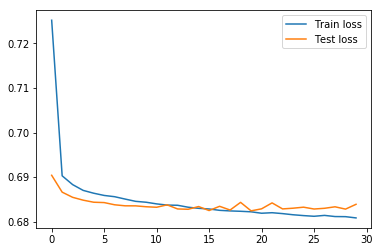

In [49]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();